In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv(r"/content/covid_data_kerala.csv")

In [ ]:
data.head()

,Date,Confirmed,Recovered,Deceased
0,2020-01-31,0.0,NaN,0.0
1,2020-02-01,0.0,NaN,0.0
2,2020-02-02,1.0,NaN,0.0
3,2020-02-03,1.0,NaN,0.0
4,2020-02-04,0.0,NaN,0.0


In [ ]:
data.isnull()

,Date,Confirmed,Recovered,Deceased
0,False,False,True,False
1,False,False,True,False
2,False,False,True,False
3,False,False,True,False
4,False,False,True,False
...,...,...,...,...
836,False,False,False,False
837,False,False,False,False
838,False,False,False,False
839,False,False,False,False


In [ ]:
data.isnull().sum()

Date          0
Confirmed     0
Recovered    56
Deceased      0
dtype: int64

In [ ]:
data.describe()

,Confirmed,Recovered,Deceased
count,841.000000,785.000000,841.000000
mean,7788.395957,8251.403822,82.656361
std,10295.657109,10575.230709,126.911451
min,0.000000,0.000000,0.000000
25%,438.000000,915.000000,8.000000
50%,4470.000000,4749.000000,25.000000
75%,9445.000000,11067.000000,122.000000
max,55475.000000,99651.000000,1205.000000


## **visualize the relationships between variables using scatter plots**

In [ ]:
data.columns


Index(['Date', 'Confirmed', 'Recovered', 'Deceased'], dtype='object')

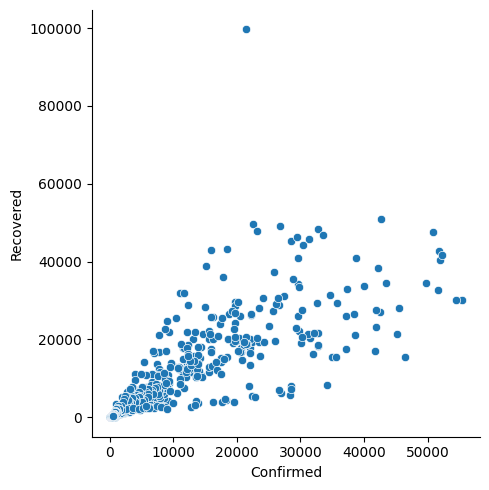

In [ ]:
sns.relplot(x='Confirmed',y='Recovered',data=data)

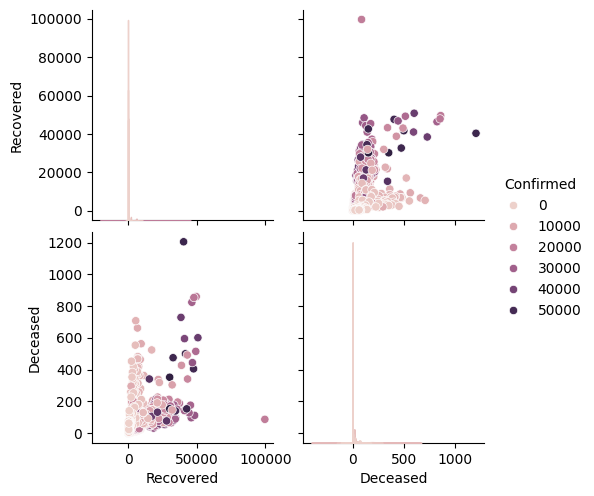

In [ ]:
sns.pairplot(data,hue='Confirmed')

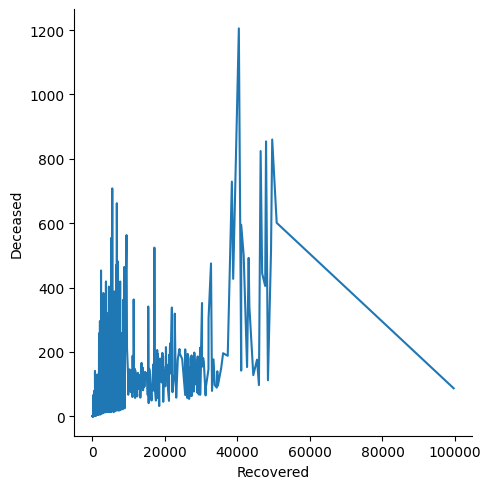

In [ ]:
sns.relplot(x='Recovered', y='Deceased', kind='line', data=data)

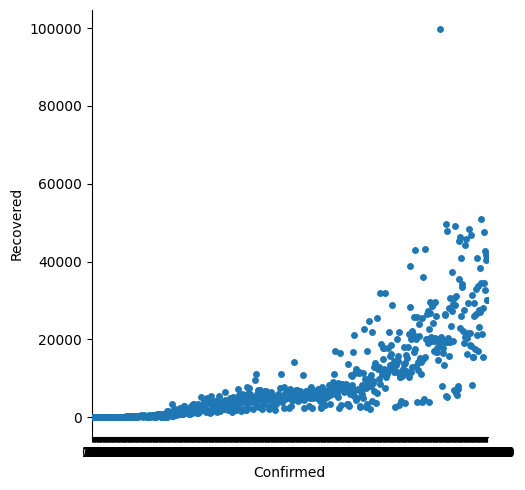

In [ ]:
sns.catplot(x='Confirmed',y='Recovered',data=data)

In [36]:
data['Recovered'].fillna(data['Recovered'].mean(), inplace=True) # Recovered needs to be accessed as a column of the DataFrame data

In [65]:
data.isnull().sum()
data.describe()

,Confirmed,Recovered,Deceased
count,841.000000,841.000000,841.000000
mean,7788.395957,8251.403822,82.656361
std,10295.657109,10216.643492,126.911451
min,0.000000,0.000000,0.000000
25%,438.000000,1304.000000,8.000000
50%,4470.000000,5149.000000,25.000000
75%,9445.000000,9972.000000,122.000000
max,55475.000000,99651.000000,1205.000000


from matplotlib import pyplot as plt
_df_8['Confirmed'].plot(kind='hist', bins=20, title='Confirmed')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Recovered'].plot(kind='hist', bins=20, title='Recovered')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Deceased'].plot(kind='hist', bins=20, title='Deceased')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11.plot(kind='scatter', x='Confirmed', y='Recovered', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_12.plot(kind='scatter', x='Recovered', y='Deceased', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Confirmed'].plot(kind='line', figsize=(8, 4), title='Confirmed')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Recovered'].plot(kind='line', figsize=(8, 4), title='Recovered')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Deceased'].plot(kind='line', figsize=(8, 4), title='Deceased')
plt.gca().spines[['top', 'right']].set_visible(False)

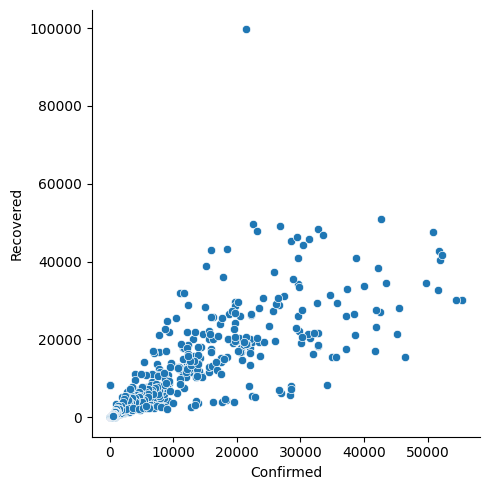

In [38]:
sns.relplot(x='Confirmed',y='Recovered',data=data)

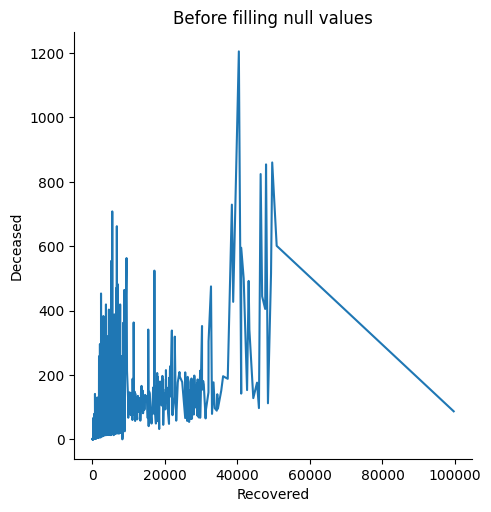

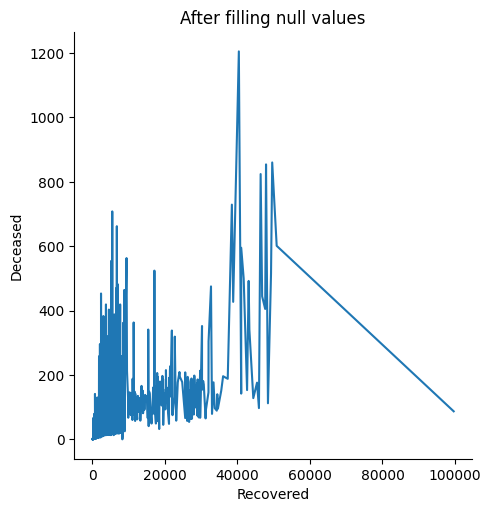

In [39]:
sns.relplot(x='Recovered', y='Deceased', kind='line', data=data)
plt.title('Before filling null values')
plt.show()

# Fill null values with the mean
data['Recovered'].fillna(data['Recovered'].mean(), inplace=True)

# Plot after filling null values
sns.relplot(x='Recovered', y='Deceased', kind='line', data=data)
plt.title('After filling null values')
plt.show()

In [40]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
836    False
837    False
838    False
839    False
840    False
Length: 841, dtype: bool

In [50]:
Q1 = data['Recovered'].quantile(0.25)
Q3 = data['Recovered'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
def find_outliers(data):
  Q1 = data['Recovered'].quantile(0.25)
  Q3 = data['Recovered'].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = data[(data['Recovered'] < lower_bound) | (data['Recovered'] > upper_bound)]
  return outliers

# Example usage:
# Assuming 'data' is your DataFrame and 'Recovered' is the column you want to check
outliers = find_outliers(data)
print(outliers)

           Date  Confirmed  Recovered  Deceased
459  2021-05-04    37190.0    26148.0      57.0
460  2021-05-05    41953.0    23106.0      58.0
461  2021-05-06    42464.0    27152.0      63.0
462  2021-05-07    38460.0    26662.0      54.0
463  2021-05-08    41971.0    27456.0      64.0
..          ...        ...        ...       ...
742  2022-02-11    16012.0    43087.0     492.0
743  2022-02-12    15184.0    38819.0     427.0
744  2022-02-13    11136.0    32004.0     146.0
745  2022-02-14     8989.0    24757.0     178.0
746  2022-02-15    11776.0    32027.0     304.0

[73 rows x 4 columns]


In [63]:
def filter_data(data, lower_bound, upper_bound):
    data_filtered = data[(data['Recovered'] >= lower_bound) & (data['Recovered'] <= upper_bound)]
    return data_filtered

# Example usage:

data_cleaned = filter_data(data, 0, 100)  # Replace with your desired bounds
print(data_cleaned)

           Date  Confirmed  Recovered  Deceased
56   2020-03-27       39.0        3.0       0.0
57   2020-03-28        6.0        8.0       1.0
58   2020-03-29       20.0        4.0       0.0
59   2020-03-30       32.0        0.0       0.0
60   2020-03-31        7.0        4.0       1.0
..          ...        ...        ...       ...
146  2020-06-25      123.0       53.0       0.0
147  2020-06-26      150.0       65.0       0.0
149  2020-06-28      118.0       42.0       0.0
150  2020-06-29      122.0       79.0       1.0
151  2020-06-30      131.0       75.0       1.0

[95 rows x 4 columns]


In [64]:
data.describe()

,Confirmed,Recovered,Deceased
count,841.000000,841.000000,841.000000
mean,7788.395957,8251.403822,82.656361
std,10295.657109,10216.643492,126.911451
min,0.000000,0.000000,0.000000
25%,438.000000,1304.000000,8.000000
50%,4470.000000,5149.000000,25.000000
75%,9445.000000,9972.000000,122.000000
max,55475.000000,99651.000000,1205.000000


from matplotlib import pyplot as plt
_df_0['Confirmed'].plot(kind='hist', bins=20, title='Confirmed')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Recovered'].plot(kind='hist', bins=20, title='Recovered')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Deceased'].plot(kind='hist', bins=20, title='Deceased')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='Confirmed', y='Recovered', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Recovered', y='Deceased', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['Confirmed'].plot(kind='line', figsize=(8, 4), title='Confirmed')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['Recovered'].plot(kind='line', figsize=(8, 4), title='Recovered')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['Deceased'].plot(kind='line', figsize=(8, 4), title='Deceased')
plt.gca().spines[['top', 'right']].set_visible(False)